In [1]:
import os 
import time
import copy
from tqdm import tqdm

import numpy as np 
import math
import matplotlib.pyplot as plt
import scipy
from scipy import linalg
import pandas as pd

from joblib import Parallel, delayed
from numba import jit, njit, prange, cuda, float32, float64, complex64, complex128, types
import numba as nb

# locals
from hamiltonian_generation import make_H4_sparse

# Macros and physical constants 
np.random.seed(0)
K = 10 # number of fermionic modes
J = 4 # ~"energy scale"
Q = 4 # order of coupling
N = 2*K # number of fermions
N_DIM = 2**K # Hilbert space dimensions

N_SAMPLES = 100 # number of samples to generate
N_JOBS = 20 # number of jobs to run in parallel

In [2]:
H4_func, psi, psi_pairs, psi_quads = make_H4_sparse(K, J, precompute_pairs = True, precompute_quads = True)

With K=12, J=4, Q=4...


Takes Python 3.8 seconds to create the entire Hamiltonian *function* (which includes precomputing the annihilation/creation operators, the fermion operators, the pairwise and quadwise inner-products)

Takes Mathematica 26.6 seconds (7.656 per 'Timing') to precompute the annihilation/creation operators AND fermion operators, 1.3 seconds (0.3125 per 'Timing') to compute pairwise inner-products, and 14.19 seconds (2.219 per 'Timing') to compute the quadwise inner-products. 

In [3]:
sigma_j = np.sqrt((J**2)*np.math.factorial(Q-1)/(N**(Q-1)))
js_test = np.random.normal(0, sigma_j, size=tuple([N for i in range(Q)]))

tic = time.time()
H4_test = H4_func(js_test)
toc = time.time()
duration = toc - tic
print(f"Duration: {duration//60} minutes, {duration%60} seconds")
H4_test = H4_test.toarray()

Duration: 0.0 minutes, 4.243858575820923 seconds


With K=12, J=4, Q=4...


Takes Python 108.8 seconds to compute Hamiltonian (with all pairwise and quadwise inner-products precomputed)

Takes Mathematica 129.4 seconds (33.265 per 'Timing') seconds to do the same. 

In [4]:
print(linalg.ishermitian(H4_test))
print(np.allclose(H4_test, np.real(H4_test)))
eigvals = np.linalg.eigvalsh(H4_test)

True
False


(array([12., 12., 24., 24., 30., 34., 34., 38., 40., 40., 40., 46., 46.,
        44., 44., 44., 48., 44., 40., 44., 42., 40., 38., 32., 32., 32.,
        28., 22., 18., 12.]),
 array([-3.89160321, -3.63383846, -3.3760737 , -3.11830894, -2.86054418,
        -2.60277942, -2.34501466, -2.0872499 , -1.82948514, -1.57172038,
        -1.31395562, -1.05619087, -0.79842611, -0.54066135, -0.28289659,
        -0.02513183,  0.23263293,  0.49039769,  0.74816245,  1.00592721,
         1.26369197,  1.52145672,  1.77922148,  2.03698624,  2.294751  ,
         2.55251576,  2.81028052,  3.06804528,  3.32581004,  3.5835748 ,
         3.84133956]),
 <BarContainer object of 30 artists>)

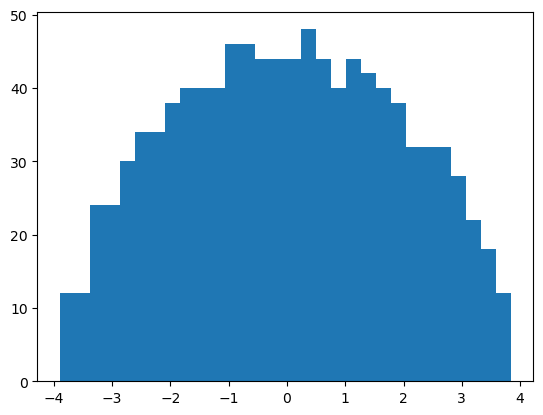

In [5]:
plt.hist(eigvals, bins=30)

In [10]:
Q = 3

from hamiltonian_generation import make_H3_sparse
H3_func, psi, psi_pairs, psi_tris = make_H3_sparse(K, precompute_pairs = True, precompute_tris = True)

sigma_j = np.sqrt((J**2)*np.math.factorial(Q-1)/(N**(Q-1)))
js_test = np.random.normal(0, sigma_j, size=tuple([N for i in range(3)]))

tic = time.time()
H3_test = H3_func(js_test)
toc = time.time()
duration = toc - tic
print(f"Duration: {duration//60} minutes, {duration%60} seconds")
H3_test = H3_test.toarray()

Duration: 0.0 minutes, 0.49137282371520996 seconds


In [ ]:
print("H3 hermitian: ", linalg.ishermitian(H3_test))
print("H3 real elements: ", np.allclose(H3_test, np.real(H3_test)))

eigvals = np.linalg.eigvalsh(H3_test)
plt.figure()
plt.hist(eigvals, bins=30)
plt.title("Q=3 eigenvalues")
plt.show()
plt.close()